# Q Learning with Frozen Lake

The FrozenLake environment consists of a 4x4 grid of blocks as follows, with each one either being the start block (S), the goal block (G), a safe frozen block (F), or a dangerous hole (H).

The objective is for an agent learn how to navigate from the start block to the goal without falling in a hole. At any time the agent can choose an action either to move up, down, left, or right. In the financial context, a similar problem could be thought of for trading decisions.

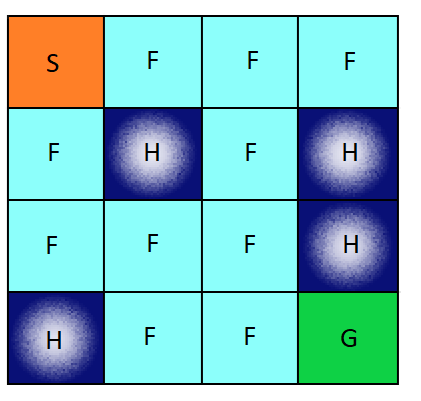

In [1]:
!pip install gym==0.10.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.8/876.8 kB 66.4 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.10.2-py3-none-any.whl size=1581203 sha256=0804f8f9a774f853a3462be98322894f254064ddbbb3a27155735e09cc959f25
  Stored in directory: /root/.cache/pip/wheels/c2/17/c0/e97c3e64dac5d611726f781837059a6249f8e8535191269b4a
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


In [2]:
import numpy as np
import gym
import random

Creating the environment

In [3]:
env = gym.make("FrozenLake-v0")

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


A table (called Q table – Q is for quality) records a value for how good it is to take a given action within a given state. There are 16 possible states, one of which for each block, and 4 possible actions (left, right, up, down), so the table is of size 16x4. The table is initialized with all zeros, and updated when rewards received for various actions are observed. The value of each cell is the maximum expected future reward for that given state and action. The reward at every step is 0, except for entering the goal block, which provides a reward of 1.

In [4]:
action_size = env.action_space.n
state_size = env.observation_space.n
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Define exploration parameters

In [5]:
total_episodes = 100000       # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 1000              # Max steps each episode
gamma = 0.95                  # Discounting rate

epsilon = 0.5                 # Exploration rate
max_epsilon = 0.5             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability
decay_rate = 0.005            # Exponential decay rate for exploration prob

Implementing the SARSA algorithm. The Q table is updated using the following equation.
$Q(S_t, A_t) ← Q(S_t, A_t) + \alpha[R_{t+1} + γQ(S_{t+1}, A_{t+1}) - Q(S_t, A_t)]$


In [6]:
def next_action(qtable, epsilon, state):
        if epsilon < random.uniform(0,1):
            return np.argmax(qtable[state,:])

        else:
            return env.action_space.sample()

In [12]:
rewards = []
for episode in range(total_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    action = next_action(qtable, epsilon, state)
    for step in range(max_steps):

        new_state, reward, done, info = env.step(action)
        new_action = next_action(qtable, epsilon, new_state)
        # Update Q-Table
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + (gamma * qtable[new_state, new_action]) - qtable[state, action])

        total_rewards += reward

        # new state
        state = new_state

        if done == True:
            break

    # Reducing epsilon
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*episode)
    rewards.append(total_rewards)

print("Average rewards: " + str(np.sum(rewards)/total_episodes))
print(qtable)

Average rewards: 0.01967
[[0.39351231 0.39942974 0.408504   0.38634998]
 [0.         0.07615036 0.39944713 0.424651  ]
 [0.         0.34246325 0.38544039 0.42041087]
 [0.         0.07902616 0.0153873  0.41831599]
 [0.50494762 0.62373339 0.59705041 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.01189829 0.01280495 0.        ]
 [0.         0.         0.         0.        ]
 [0.44846551 0.75420725 0.68411164 0.        ]
 [0.         0.71891399 0.85222208 0.        ]
 [0.         0.89788607 0.15361913 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.78128218 0.83152155 0.        ]
 [0.         0.99005278 0.97556506 0.        ]
 [0.         0.         0.         0.        ]]


In [13]:
from IPython.display import clear_output
import time
env.reset()
episodes = 5
max_steps =1000

for episode in range(episodes):
    state = env.reset()
    step = 0
    done = False
    print("*****************")
    print("Episodes", episode)
    print("*****************")

    for step in range(max_steps):
        # Take the action that has the best Q value
        action = np.argmax(qtable[state,:])
        new_state, reward, done, info = env.step(action)

        if done:
            # Only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            print("Number of steps", step)
            break
        state = new_state

env.close()

*****************
Episodes 0
*****************
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 4
*****************
Episodes 1
*****************
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 2
*****************
Episodes 2
*****************
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 49
*****************
Episodes 3
*****************
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 26
*****************
Episodes 4
*****************
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 37
